In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pickle
from pathlib import Path

In [3]:
MODELS_DIR = Path("models/")
SKLEARN_MODEL_PATH = MODELS_DIR.joinpath("sklearn/iris_model.pk")
TF_MODEL_PATH = MODELS_DIR.joinpath("tf/iris_model")

SKLEARN_MODEL_PATH.parent.mkdir(exist_ok=True, parents=True)
TF_MODEL_PATH.parent.mkdir(exist_ok=True, parents=True)

# Train model using sklearn

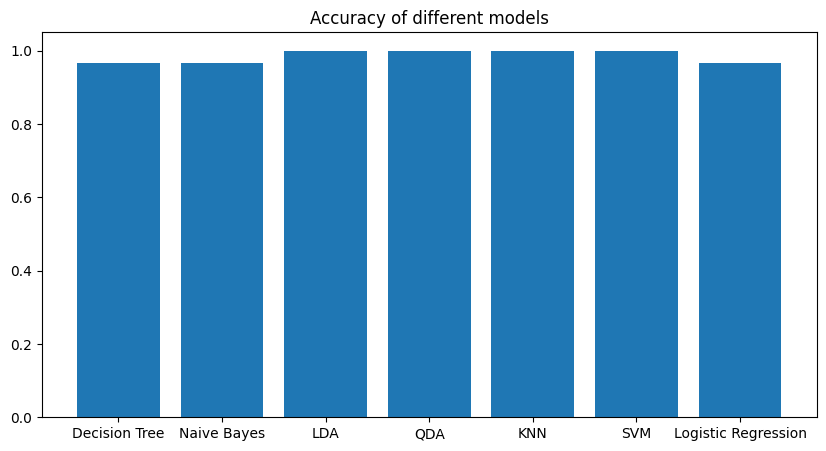

The best model is LDA with an accuracy of 1.00


In [12]:

# Load the iris dataset
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

X = df[
    [
        "sepal length (cm)",
        "sepalwidth  (cm)",
        "petal length (cm)",
        "petal width (cm)",
    ]
]
y = df["target"]  # target is the species of the flower

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create a list of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=1),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(kernel="linear"),
    "Logistic Regression": LogisticRegression(),
}

# Train the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = metrics.accuracy_score(y_test, y_pred)

# Plot results
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title("Accuracy of different models")
plt.show()

# Print results
best_model = max(results, key=results.get)
print(f"The best model is {best_model} with an accuracy of {results[best_model]:.2f}")

# save the model to disk
pickle.dump(
    models[best_model], open(SKLEARN_MODEL_PATH, "wb")
)  # export the model to a file so we can use it later


# Train model using Tensorflow

In [14]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from pathlib import Path
import numpy as np

/Users/haruiz/Workspace/UAO-workspace/FullStack-AI-2023/my-first-project/backend/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
tf.config.list_physical_devices('GPU')

[]

In [18]:
train_dataset, metadata = tfds.load("iris", with_info=True, as_supervised=True, split="train", batch_size=32)
num_examples = metadata.splits["train"].num_examples
num_classes = metadata.features["label"].num_classes
labels = metadata.features["label"].names

Dl Size...: 0 MiB [00:00, ? MiB/s]1/1 [00:00<00:00,  3.06 url/s]
Dl Completed...: 100%|██████████| 1/1 [00:00<00:00,  3.02 url/s]
                                                                

Dataset iris downloaded and prepared to /Users/haruiz/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.


In [19]:
num_examples

150

In [20]:
labels

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [22]:
num_classes

3

(32, 4)


2023-08-19 11:53:14.006730: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


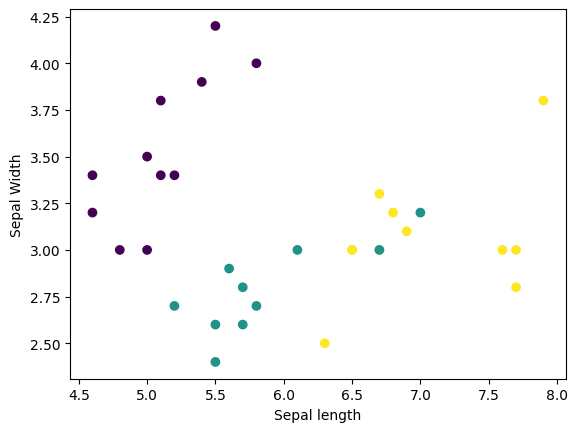

In [24]:
features, labels = next(iter(train_dataset))
sepal_length = features[:,0]
sepal_width = features[:,1]
print(features.shape)

plt.scatter(sepal_length,
            sepal_width,
            c=labels,
            cmap='viridis')
plt.xlabel("Sepal length")
plt.ylabel("Sepal Width")
plt.show()

In [25]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,), name= "input"), 
  tf.keras.layers.Dense(5, activation=tf.nn.relu),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax, name="output")
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                50        
                                                                 
 dense (Dense)               (None, 5)                 55        
                                                                 
 batch_normalization (Batch  (None, 5)                 20        
 Normalization)                                                  
                                                                 
 output (Dense)              (None, 3)                 18        
                                                                 
Total params: 143 (572.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 10 (40.00 Byte)
_________________________________________________________________


Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 2.0998 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 711us/step - loss: 2.0576 - accuracy: 0.0067
Epoch 3/50
5/5 [==============================] - 0s 748us/step - loss: 1.9867 - accuracy: 0.0200
Epoch 4/50
5/5 [==============================] - 0s 641us/step - loss: 1.7920 - accuracy: 0.0733
Epoch 5/50
5/5 [==============================] - 0s 649us/step - loss: 1.4158 - accuracy: 0.1333
Epoch 6/50
5/5 [==============================] - 0s 589us/step - loss: 1.3168 - accuracy: 0.1733
Epoch 7/50
5/5 [==============================] - 0s 658us/step - loss: 1.2982 - accuracy: 0.1933
Epoch 8/50
5/5 [==============================] - 0s 584us/step - loss: 1.2743 - accuracy: 0.2000
Epoch 9/50
5/5 [==============================] - 0s 671us/step - loss: 1.2404 - accuracy: 0.2333
Epoch 10/50
5/5 [==============================] - 0s 762us/step - loss: 1.1897 - accuracy: 0.3333
Epoch 11/50
5/5 [

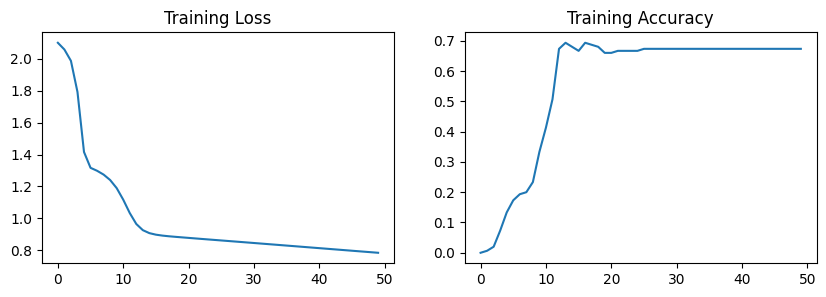

In [27]:
loss_fun = tf.keras.losses.SparseCategoricalCrossentropy()
opt_fun = tf.keras.optimizers.Adam()
model.compile(optimizer=opt_fun, loss=loss_fun, metrics=['accuracy'] )
history = model.fit(train_dataset, batch_size=12, epochs=50)

acc = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(10, 3))
ax = plt.subplot(1, 2, 1)
ax.set_title("Training Loss")
ax.plot(loss)
ax = plt.subplot(1, 2, 2)
ax.set_title("Training Accuracy")
ax.plot(acc)
plt.show()

In [28]:
predictions = model.predict([[0.5, 0.4, 0.8, 0.4]])

1/1 [==============================] - 0s 50ms/step


In [29]:
predictions

array([[0.15704544, 0.46824205, 0.37471253]], dtype=float32)

In [30]:
model.save(TF_MODEL_PATH, save_format="tf")

INFO:tensorflow:Assets written to: models/tf/iris_model/assets


INFO:tensorflow:Assets written to: models/tf/iris_model/assets


In [ ]:
import shutil
from pathlib import Path
from google.colab import files
import sys

def folder_to_zip(folder_path):
    folder_path = Path(folder_path)
    if not folder_path.exists():
        return
    shutil.make_archive(folder_path.name, 'zip', folder_path)
    return folder_path.with_suffix(".zip")

def zip_and_download_folder_content(model_folder):
    zip_file = folder_to_zip(model_folder)
    files.download(zip_file)



In [ ]:
zip_and_download_folder_content(MODELS_DIR)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>